# 1.

# Importing Libraries

In [58]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Importing Data 

In [61]:
path = r'C:\Users\drbar\Documents\Career Foundry\Projects\04 - 25 Instacart Basket Analysis'

In [63]:
df49 = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','df49_merge.pkl'))

In [64]:
#Checking the dataframe
df49.head(10)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,order_regularity,first_name,last_name,gender,state,age,date_joined,dependents,fam_status,income
0,196,Soda,77,7,9.0,431534,1,5,4,15,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,196,Soda,77,7,9.0,473747,1,3,3,12,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,196,Soda,77,7,9.0,550135,1,7,1,9,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,196,Soda,77,7,9.0,2254736,1,4,4,7,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,196,Soda,77,7,9.0,2295261,1,9,1,16,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
5,196,Soda,77,7,9.0,2398795,1,2,3,7,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
6,196,Soda,77,7,9.0,2539329,1,1,2,8,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
7,196,Soda,77,7,9.0,2550362,1,10,4,8,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
8,196,Soda,77,7,9.0,3108588,1,8,1,14,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
9,196,Soda,77,7,9.0,3367565,1,6,2,7,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [65]:
df49.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 32 columns):
 #   Column                          Dtype   
---  ------                          -----   
 0   product_id                      int64   
 1   product_name                    object  
 2   aisle_id                        int64   
 3   department_id                   int64   
 4   prices                          float64 
 5   order_id                        int64   
 6   user_id                         int64   
 7   order_number                    int64   
 8   orders_day_of_week              int64   
 9   order_hour_of_day               int64   
 10  days_since_prior_order          float64 
 11  add_to_cart_order               float64 
 12  reordered                       float64 
 13  _merge                          category
 14  price_range_loc                 object  
 15  busiest_days                    object  
 16  hourly_order_flag               object  
 17  max_or

# 3. 

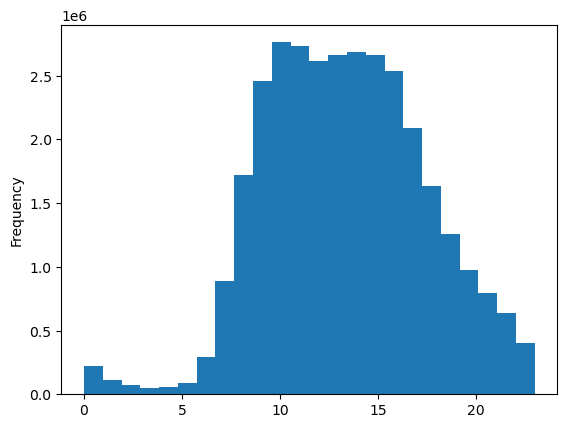

In [103]:
#Creating histogram representing "order_hour_of_day" from largest to smallest
order_hour_of_day_histo = df49['order_hour_of_day'].plot.hist(bins=24)

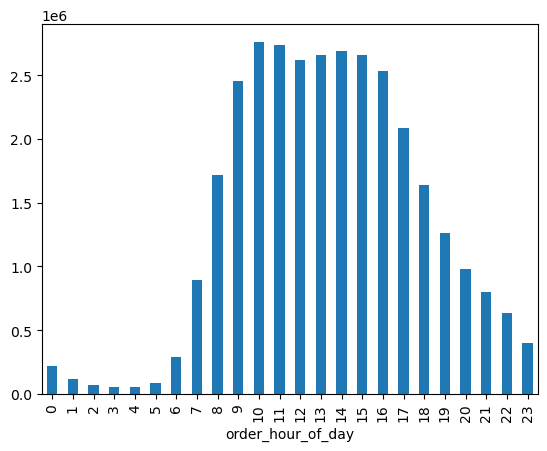

In [105]:
# Creating a bar chart representing "order_hour_of_day" in index order
order_hour_of_day_bar = df49['order_hour_of_day'].value_counts().sort_index().plot.bar()

## The bar chart shows that business tends to pick up at 7, then peaks between 9 and 16 before tapering off. The tail of the day, 17-23 is much stronger than the start of the day, 0-6.

## 4.

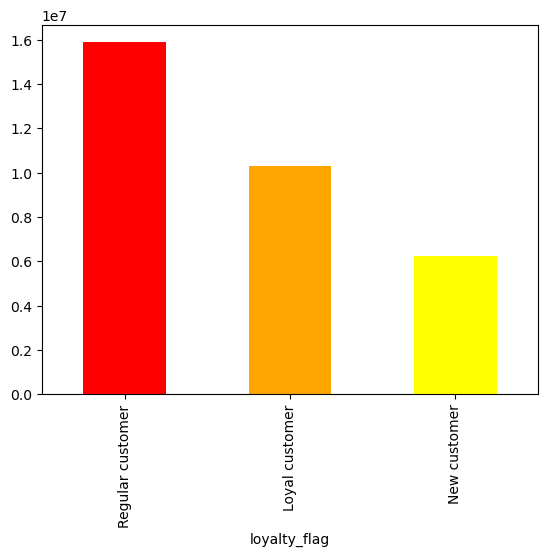

In [107]:
# Creating a "loyalty_flag" bar chart
loyalty_flag_bar = df49['loyalty_flag'].value_counts().plot.bar(color =['red','orange','yellow'])

## 5.

In [73]:
# Creating a sample 
np.random.seed(4)
dev = np.random.rand(len(df49)) <= 0.7

In [74]:
big = df49[dev]

In [75]:
small = df49[~dev]

In [76]:
# Confirming the samples are of proper length
len(df49)

32404859

In [77]:
len(big)+len(small)

32404859

In [78]:
# Creating a new dataframe that contains only the 'prices' and 'order_hour_of_day' columns from the 'small' subset
hourly_avg = small.groupby('order_hour_of_day')['prices'].mean().reset_index()

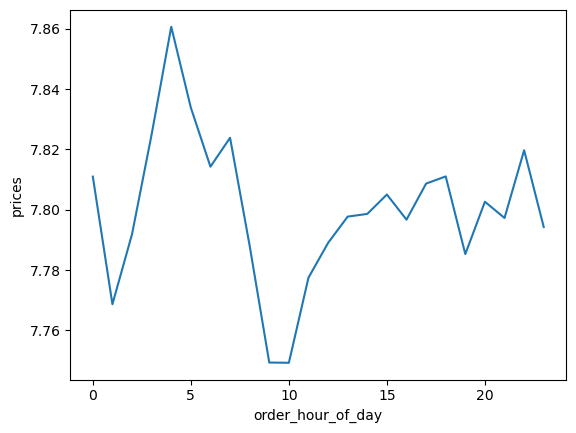

In [113]:
# Creating a line plot from the small subset
order_hour_of_day_small_line = sns.lineplot(data=hourly_avg, x='order_hour_of_day', y='prices')

In [115]:
# Creating a new dataframe that contains only the 'prices' and 'order_hour_of_day' columns from the 'big' subset to check consistency
hourly_avg2 = big.groupby('order_hour_of_day')['prices'].mean().reset_index()

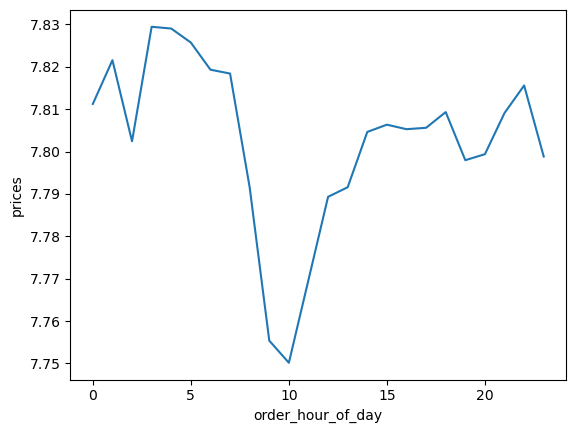

In [116]:
# Creating a line plot from the 'big' subset
order_hour_of_day_big_line = sns.lineplot(data=hourly_avg2, x='order_hour_of_day', y='prices')

In [82]:
df49.info('prices')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 32 columns):
 #   Column                          Dtype   
---  ------                          -----   
 0   product_id                      int64   
 1   product_name                    object  
 2   aisle_id                        int64   
 3   department_id                   int64   
 4   prices                          float64 
 5   order_id                        int64   
 6   user_id                         int64   
 7   order_number                    int64   
 8   orders_day_of_week              int64   
 9   order_hour_of_day               int64   
 10  days_since_prior_order          float64 
 11  add_to_cart_order               float64 
 12  reordered                       float64 
 13  _merge                          category
 14  price_range_loc                 object  
 15  busiest_days                    object  
 16  hourly_order_flag               object  
 17  max_or

I'm not sure if this was intended, but I found major inconsistency in the two charts the first time I ran the codes. I realized that while we had imputed over outliers within the 'prices' column, we had done so within the read section of 4.9 and not exported it at the end. I went back and exported the dataframe from that notebook, then reran part 1 of this exercise and the problem was resolved. 

## 6.

In [86]:
age_dependents = df49.groupby('age')['dependents'].mean().reset_index() 

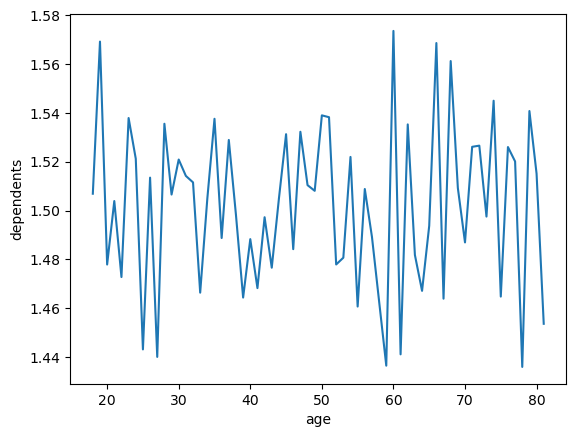

In [119]:
age_dependents_line = sns.lineplot(data=age_dependents, x='age', y='dependents')

The line chart shows that there is very little correlation between age and number of dependents. The number of dependents remains stable across all age groups, with only minor fluctuations. This suggests that age alone may not be a strong predictor of family situations in this dataset.

## 7. 

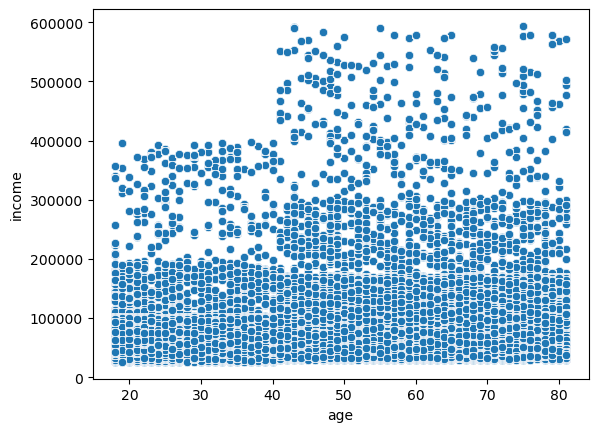

In [121]:
# Creating a scatterplot to inspect the correlation of age to income within our customer base
age_income_scatter = sns.scatterplot(x = 'age', y = 'income', data = df49)

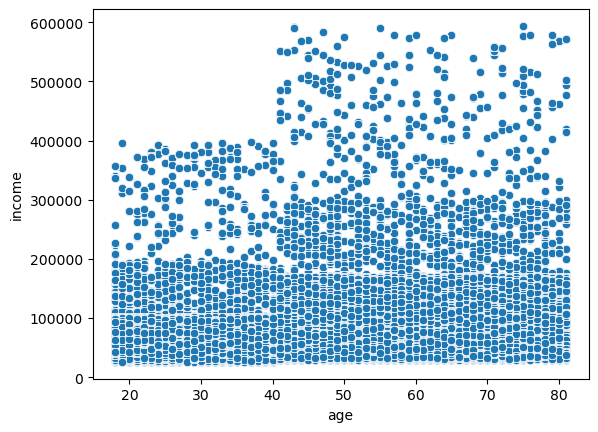

In [122]:
# Creating a scatterplot to inspect the correlation of age to income within the 'big' sample
age_income_big_scatter = sns.scatterplot(x = 'age', y = 'income', data = big)

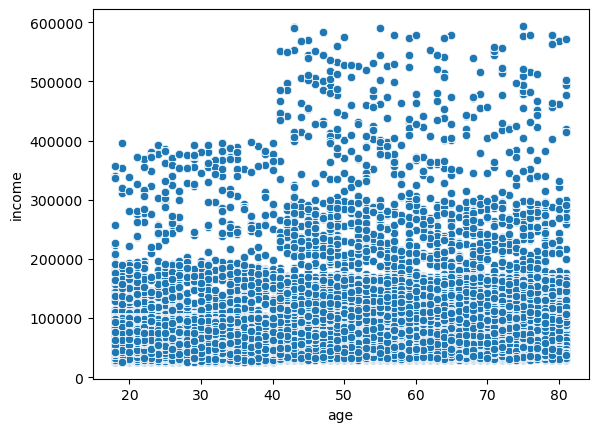

In [123]:
# Creating a scatterplot to inspect the correlation of age to income within the 'small' sample
age_income_small_scatter = sns.scatterplot(x = 'age', y = 'income', data = small)

While there is a wide spread of income across all age groups, there appears to be a slight upward trend in income with age, notably after 40. However, the relationship does not follow a clear linear pattern, as a number of younger customers also present high income levels. This indicates that while age may have some influence on income, other variables are likely contributing to differences in spending power.

## 8.

# Exporting PNGs

In [128]:
order_hour_of_day_histo.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','hist_order_hour_of_day.png'))

In [130]:
order_hour_of_day_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_order_hour_of_day.png'))

In [132]:
loyalty_flag_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_loyalty_flag.png'))

In [134]:
order_hour_of_day_small_line.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','line_order_hour_of_day_small.png'))

In [136]:
order_hour_of_day_big_line.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','line_order_hour_of_day.png'))

In [138]:
age_dependents_line.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','line_age_dependents.png'))

In [140]:
age_income_scatter.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','scatter_age_income.png'))

In [144]:
age_income_big_scatter.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','scatter_age_income_big.png'))

In [145]:
age_income_small_scatter.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','scatter_age_income_small.png'))